<a href="https://colab.research.google.com/github/SithmiDesilva/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-II/EDA_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load The Dataset
data=pd.read_csv("/content/drive/MyDrive/DSGP/preprocessed_new_dataset.csv")

# **Exploratory Data Analysis For Features**

In [4]:
data.head()

,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,HPV_Related,Continent
0,Male,34.0,1.0,1.0,High,0.0,Africa
1,Female,84.0,1.0,1.0,High,0.0,Europe
2,Female,62.0,1.0,1.0,Middle,1.0,Europe
3,Male,48.0,1.0,1.0,Middle,0.0,Africa
4,Male,26.0,1.0,1.0,Middle,0.0,Europe


In [5]:
data.shape

(64653, 7)

In [6]:
data.columns

Index(['Gender', 'Age', 'Tobacco_Use', 'Alcohol_Use', 'Socioeconomic_Status',
       'HPV_Related', 'Continent'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                64653 non-null  object 
 1   Age                   64653 non-null  float64
 2   Tobacco_Use           64653 non-null  float64
 3   Alcohol_Use           64653 non-null  float64
 4   Socioeconomic_Status  64653 non-null  object 
 5   HPV_Related           64653 non-null  float64
 6   Continent             64653 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.5+ MB


In [8]:
data.describe()

,Age,Tobacco_Use,Alcohol_Use,HPV_Related
count,64653.000000,64653.000000,64653.000000,64653.000000
mean,51.672807,0.543239,0.499930,0.407282
std,20.678114,0.498131,0.500004,0.491332
min,20.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000


In [9]:
#Identify missing values
data.isnull().sum()

,0
Gender,0
Age,0
Tobacco_Use,0
Alcohol_Use,0
Socioeconomic_Status,0
HPV_Related,0
Continent,0


In [10]:
#Identify duplicate values
data.duplicated().sum()

49328

In [11]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object','category']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['Age', 'Tobacco_Use', 'Alcohol_Use', 'HPV_Related']
Categorical Features: ['Gender', 'Socioeconomic_Status', 'Continent']


In [12]:
data.nunique()

,0
Gender,2
Age,70
Tobacco_Use,2
Alcohol_Use,2
Socioeconomic_Status,3
HPV_Related,2
Continent,5


In [13]:
#Identify Unique Values

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Age':
[34. 84. 62. 48. 26. 22. 76. 49. 60. 20. 86. 72. 28. 27. 31. 41. 36. 50.
 25. 37. 67. 40. 21. 70. 23. 57. 24. 39. 80. 30. 55. 32. 43. 66. 83. 79.
 81. 35. 33. 69. 88. 71. 59. 75. 51. 52. 78. 38. 65. 44. 29. 64. 82. 42.
 87. 56. 73. 53. 58. 77. 61. 54. 63. 74. 45. 68. 46. 85. 47. 89.]

Unique values in 'Tobacco_Use':
[1. 0.]

Unique values in 'Alcohol_Use':
[1. 0.]

Unique values in 'Socioeconomic_Status':
['High' 'Middle' 'Low']

Unique values in 'HPV_Related':
[0. 1.]

Unique values in 'Continent':
['Africa' 'Europe' 'Asia' 'South America' 'North America']



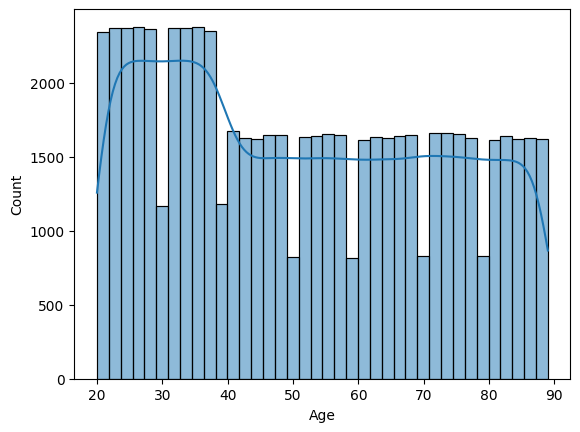

In [14]:
#Univariate Analysis (Individual Feature Analysis)
#Identify Numerical Feature distribution using Histograms and Boxplots

sns.histplot(data['Age'], kde=True)
plt.show()





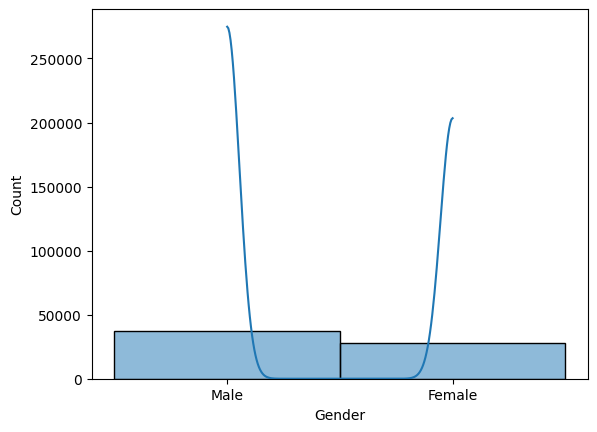

In [15]:
sns.histplot(data['Gender'], kde=True)
plt.show()

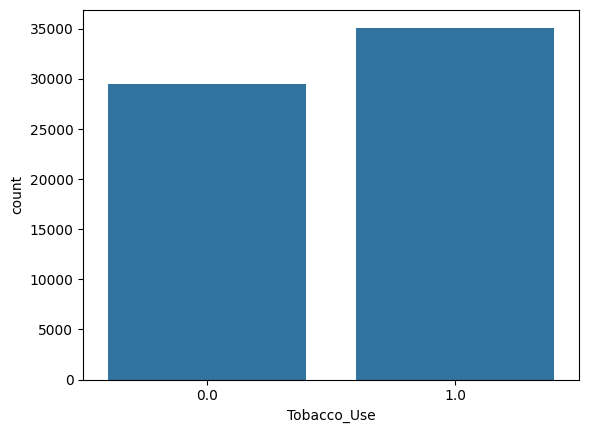

<Figure size 1000x1000 with 0 Axes>

In [16]:
#Count Plots for Categorical Features
sns.countplot(x=data['Tobacco_Use'])
plt.figure(figsize=(10,10)) # Corrected line: providing figsize as a tuple
plt.show()

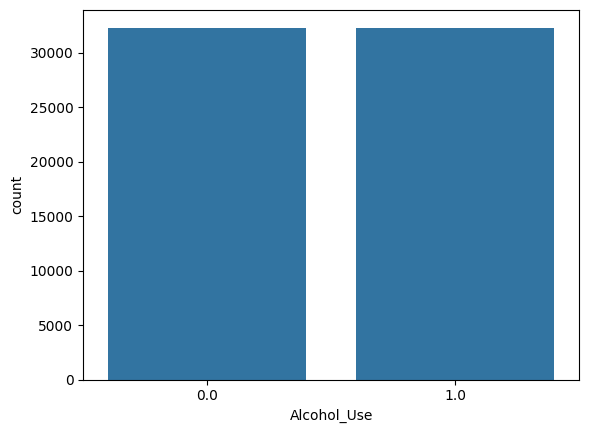

<Figure size 600x600 with 0 Axes>

In [17]:
#Count Plots for Categorical Features
sns.countplot(x=data['Alcohol_Use'])
plt.figure(figsize=(6,6)) # Corrected line: providing figsize as a tuple
plt.show()

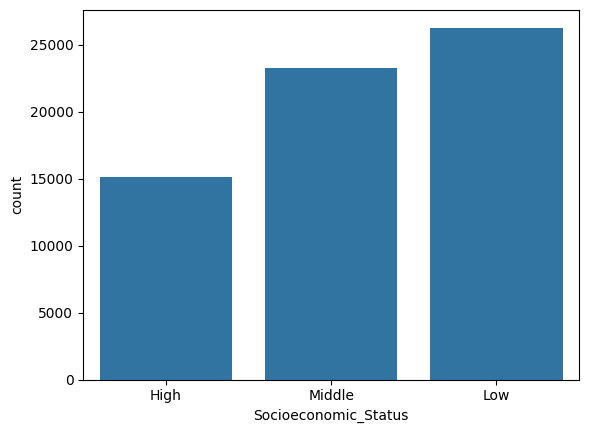

<Figure size 600x600 with 0 Axes>

In [18]:
#Count Plots for Categorical Features
sns.countplot(x=data['Socioeconomic_Status'])
plt.figure(figsize=(6,6)) # Corrected line: providing figsize as a tuple
plt.show()

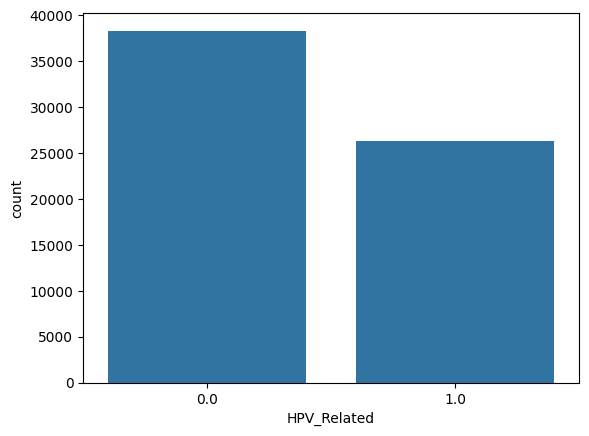

<Figure size 600x600 with 0 Axes>

In [19]:
#Count Plots for Categorical Features
sns.countplot(x=data['HPV_Related'])
plt.figure(figsize=(6,6)) # Corrected line: providing figsize as a tuple
plt.show()

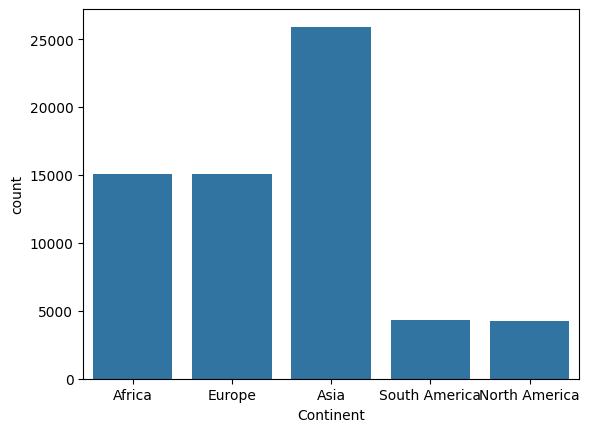

<Figure size 600x600 with 0 Axes>

In [20]:
#Count Plots for Categorical Features
sns.countplot(x=data['Continent'])
plt.figure(figsize=(6,6)) # Corrected line: providing figsize as a tuple
plt.show()

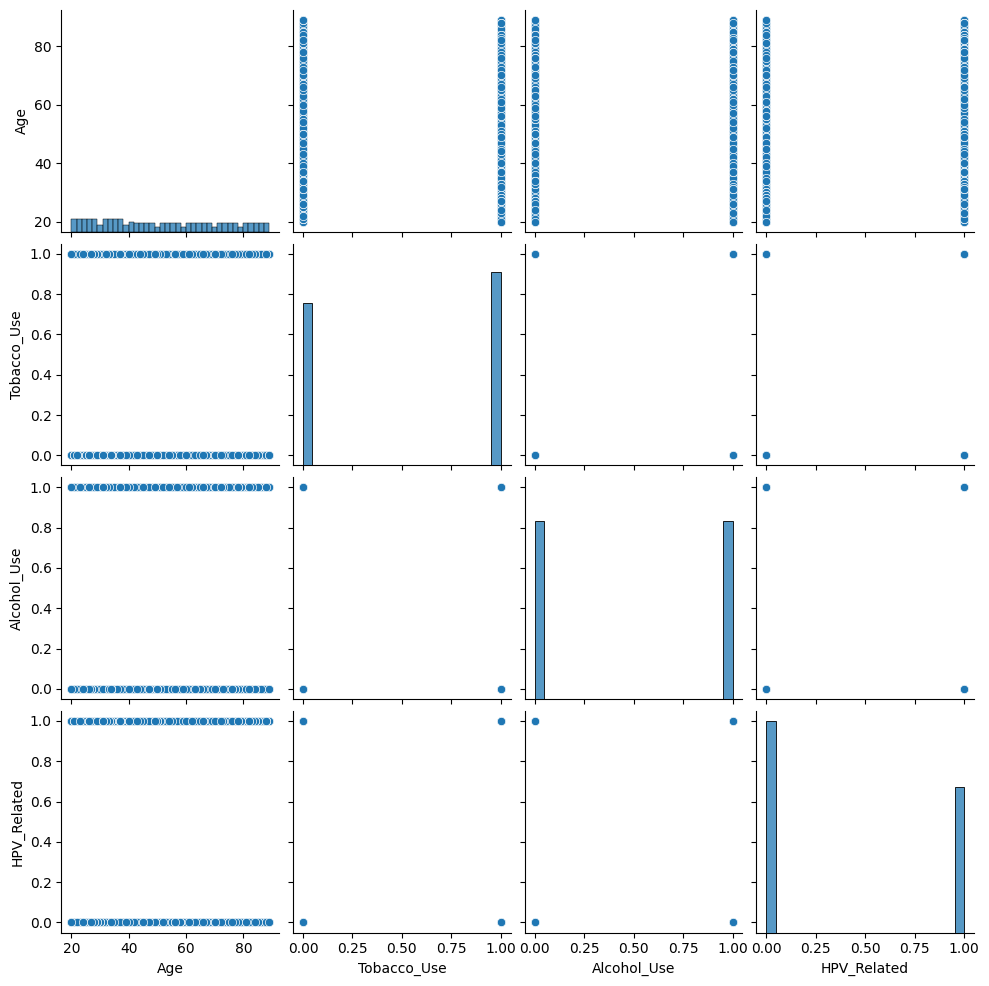

In [21]:
sns.pairplot(data)

In [26]:
#Check skewness and kurtosis of numerical features
print(data.skew())
print(data.kurtosis())

Tobacco_Use   -0.173608
dtype: float64
Tobacco_Use   -1.969921
dtype: float64


# **Correlation Analysis**

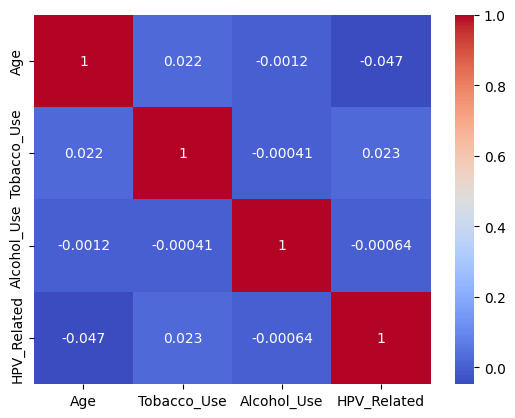

In [22]:
#Bivariate and Multivariate Analysis
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number) # selects the numerical data from the dataframe and store in a new dataframe called numerical_data
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

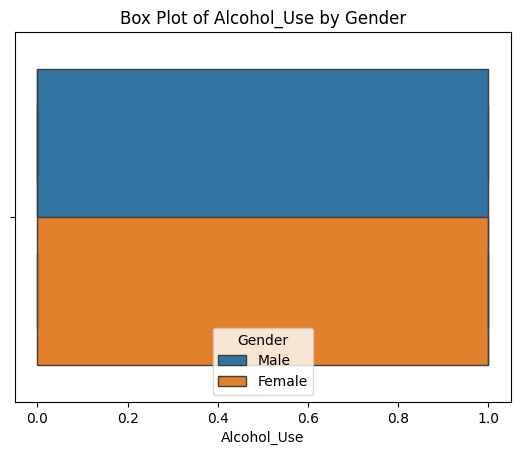

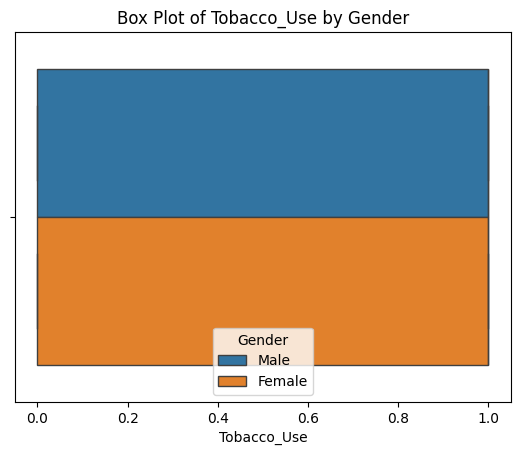

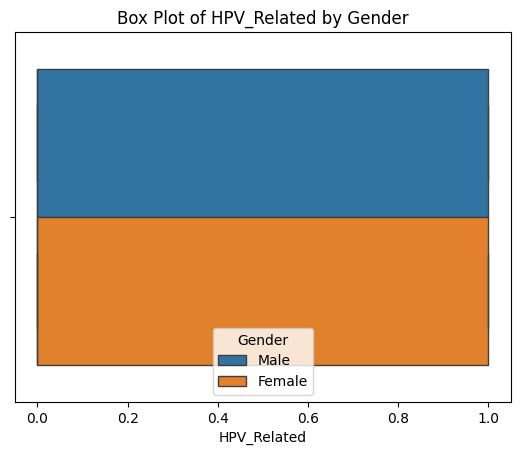

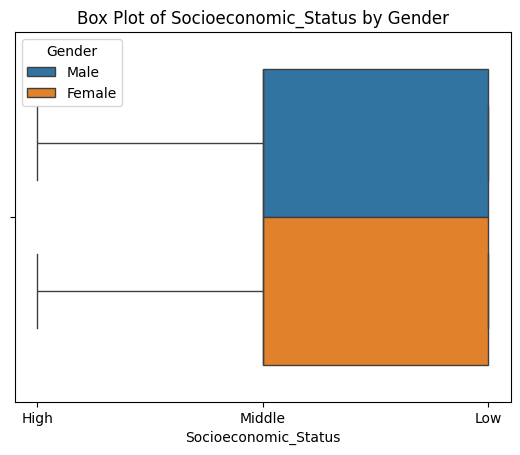

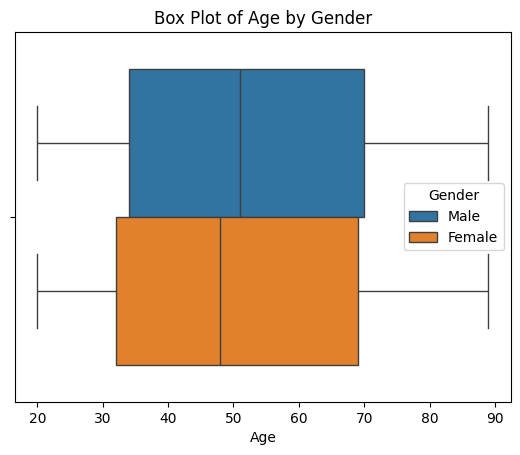

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features you want to plot
features_to_plot = [ 'Alcohol_Use', 'Tobacco_Use','HPV_Related','Socioeconomic_Status','Age']

# Iterate through the features and create box plots
for feature in features_to_plot:
    plt.figure()  # Create a new figure for each plot to avoid overlapping
    sns.boxplot(x=data[feature], hue=data['Gender'])  # Group by 'gender'
    plt.title(f'Box Plot of {feature} by Gender') # Set title with feature name
    plt.show()

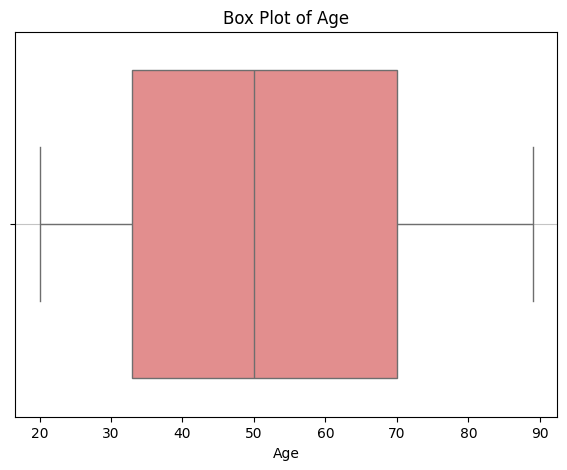

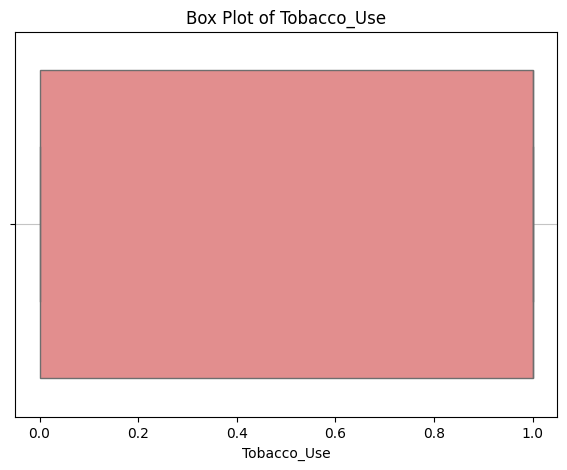

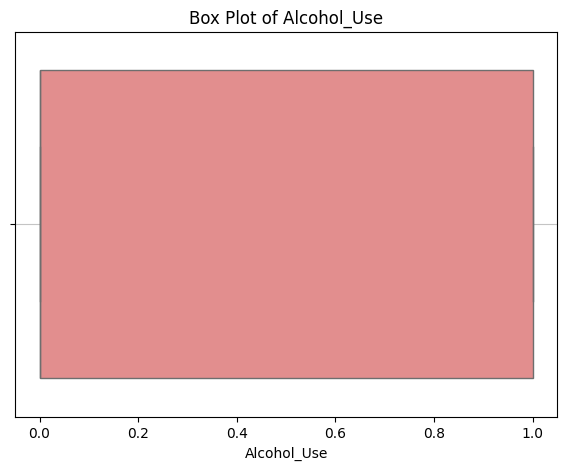

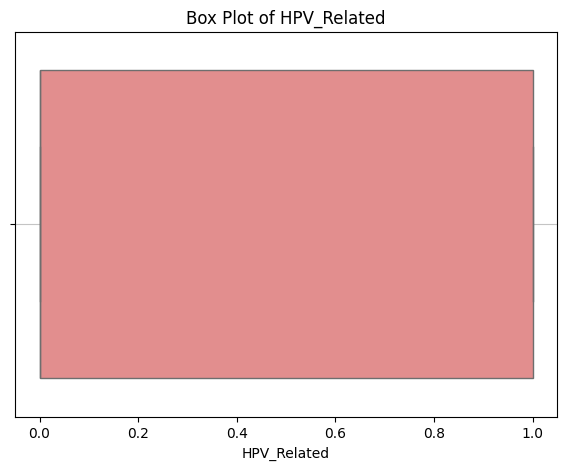

In [24]:
# Plot box plots for specific numerical variables to identify outliers
import pandas as pd # import pandas

# Assuming 'data' is a NumPy array and you have original column names
original_column_names = data.columns.tolist()  # Get column names
data = pd.DataFrame(data, columns=original_column_names) # Convert data back to DataFrame

for column in ['Age', 'Tobacco_Use', 'Alcohol_Use', 'HPV_Related']:
    if column in data.select_dtypes(include=[np.number, object]).columns: # include both numerical and object types
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=data, x=column, color='lightcoral')
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.grid(axis='y', alpha=0.75)
        plt.show()

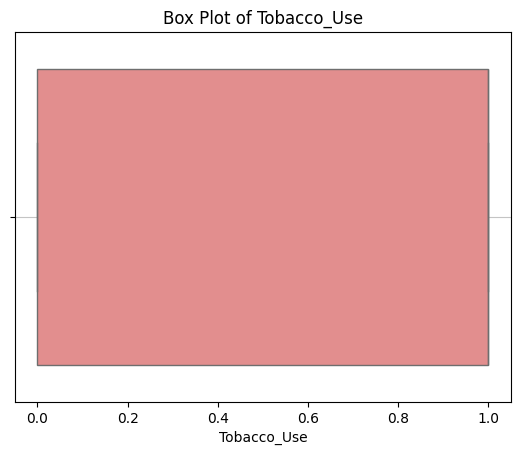

In [25]:
#Removing Outliers
# Convert the NumPy array 'data' back to a Pandas DataFrame with the original column names.
# Assuming the original DataFrame had a column named 'age':
import pandas as pd
# Replace 'original_column_names' with the actual list of column names from the original DataFrame.
original_column_names = ['Tobacco_Use',] # Example column names, replace as needed.
data = pd.DataFrame(data, columns=original_column_names)

Q1 = data['Tobacco_Use'].quantile(0.25)
Q3 = data['Tobacco_Use'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Tobacco_Use'] >= (Q1 - 1.5 * IQR)) & (data['Tobacco_Use'] <= (Q3 + 1.5 * IQR))]

sns.boxplot(data=data, x='Tobacco_Use', color='lightcoral')
plt.title(f"Box Plot of Tobacco_Use")
plt.xlabel('Tobacco_Use')
plt.grid(axis='y', alpha=0.75)
plt.show()


## **Label Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Print unique values before encoding
print("Unique values before encoding:")
for col in categorical_features:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}':")
    for value in unique_values:
        print(f"  - {value}")  # Print each unique value with indentation
    print("\n")

# Apply LabelEncoder to categorical features
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

# Print unique values after encoding
print("\nUnique values after encoding:")
for col in categorical_features:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}':")
    for value in unique_values:
        print(f"  - {value}")  # Print each unique value with indentation
    print("\n")

print("Categorical features encoded successfully.")

Unique values before encoding:
Unique values in 'Gender':
  - 0


Unique values in 'Socioeconomic_Status':
  - 0


Unique values in 'Continent':
  - 0



Unique values after encoding:
Unique values in 'Gender':
  - 0


Unique values in 'Socioeconomic_Status':
  - 0


Unique values in 'Continent':
  - 0


Categorical features encoded successfully.


# **Standard Scaler**

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Numerical features standardized successfully.")
